 # Q.1. Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.
### Data Description:

Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States 

## import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [4]:
#read data
crime_data = pd.read_csv('crime_data.csv')
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# EDA

In [6]:
crime_data.shape

(50, 5)

In [8]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [12]:
#check for null values
crime_data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

### No null value present in data.

In [14]:
#check for dupicate data
crime_data.duplicated().sum()

0

### NO duplicate data present in dataset.

In [15]:
crime_data.describe(include = 'all')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
count,50,50.00000,50.000000,50.000000,50.000000
unique,50,NaN,NaN,NaN,NaN
top,Alabama,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,7.78800,170.760000,65.540000,21.232000
std,NaN,4.35551,83.337661,14.474763,9.366385
min,NaN,0.80000,45.000000,32.000000,7.300000
25%,NaN,4.07500,109.000000,54.500000,15.075000
50%,NaN,7.25000,159.000000,66.000000,20.100000
75%,NaN,11.25000,249.000000,77.750000,26.175000


# Data Preparation

In [16]:
crime_data.rename(columns = {"Unnamed: 0":"States"}, inplace=True)
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [18]:
#feature scaling
scalar = MinMaxScaler()
scalar=scalar.fit_transform(crime_data.iloc[:,1:])

In [20]:
scaled_data = pd.DataFrame(scalar,columns=['Murder','Assault','UrbanPop','Rape'])
scaled_data.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


# Hierarchical Clustering
## Method : Single

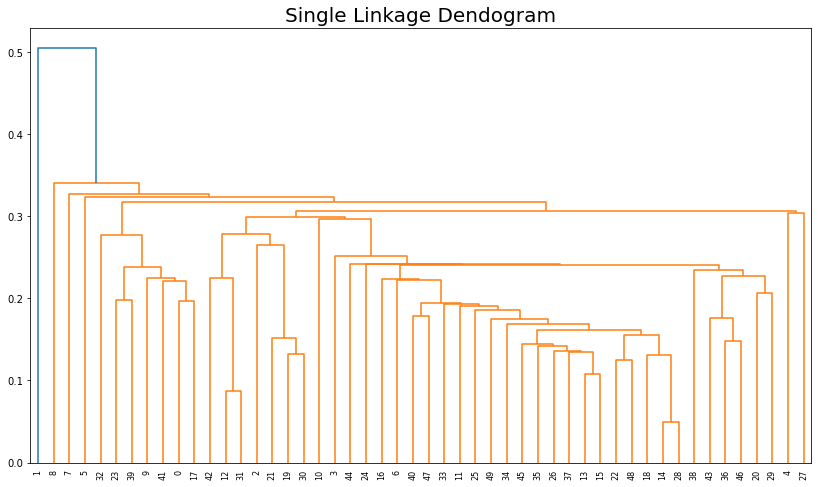

In [22]:
fig = plt.figure(figsize = (14,8))
dendogram = sch.dendrogram(sch.linkage(scaled_data, method = 'single'))
plt.title('Single Linkage Dendogram', size = 20)
plt.show()

In [23]:
hie_clustering_1 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'single')

In [24]:
pred_y_1 = hie_clustering_1.fit_predict(scaled_data)

In [25]:
crime_data['Cluster'] = pred_y_1
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [27]:
crime_data['Cluster'].value_counts()

0    49
1     1
Name: Cluster, dtype: int64

## Method : Complete

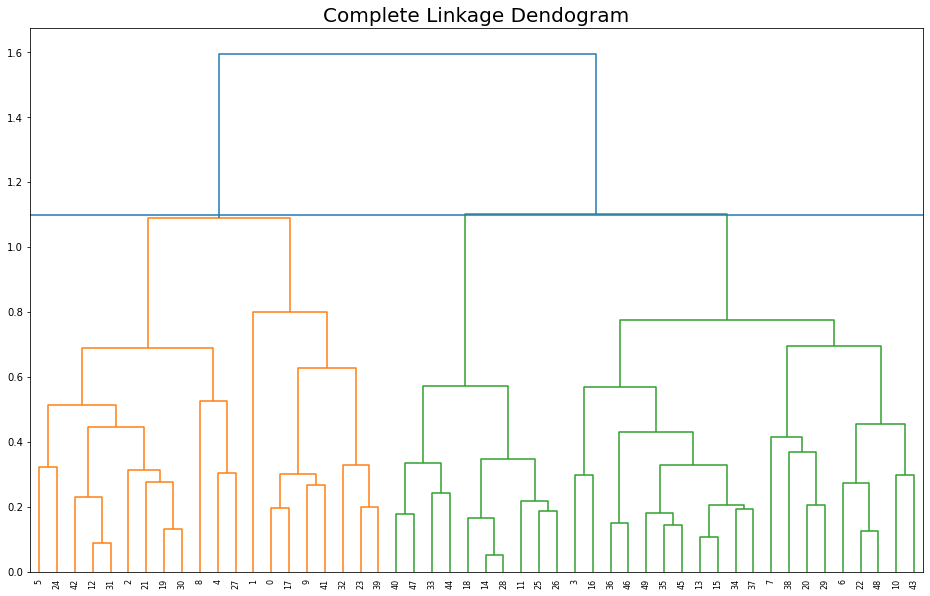

In [29]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(scaled_data, method = 'complete'))
plt.title('Complete Linkage Dendogram', size = 20)
plt.axhline(y=1.1)
plt.show()

In [30]:
hie_clustering_2 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')

In [32]:
pred_y_2 = hie_clustering_2.fit_predict(scaled_data)

In [34]:
crime_data['Cluster'] = pred_y_2
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


In [36]:
crime_data['Cluster'].value_counts()

1    20
3    12
2    10
0     8
Name: Cluster, dtype: int64

## Method: average

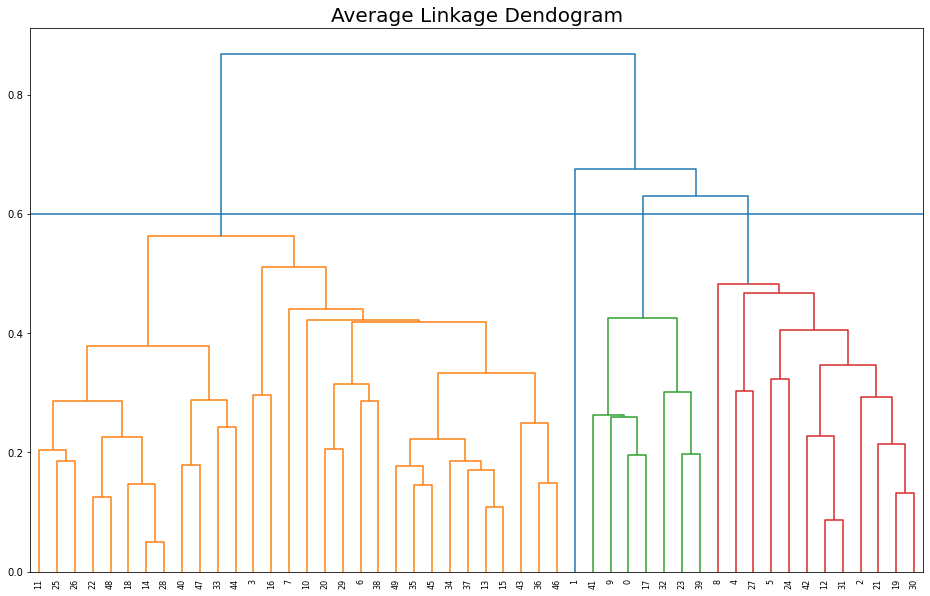

In [38]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(scaled_data, method = 'average'))
plt.title('Average Linkage Dendogram', size = 20)
plt.axhline(y=0.6);

In [40]:
hie_clustering_3 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'average')

In [41]:
pred_y_3 = hie_clustering_3.fit_predict(scaled_data)

In [42]:
crime_data['Cluster'] = pred_y_3
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [43]:
crime_data['Cluster'].value_counts()

0    30
1    12
3     7
2     1
Name: Cluster, dtype: int64

# DBSCAN Clustering

In [45]:
dbscan = DBSCAN(eps = 0.3, min_samples = 3)
dbscan.fit(scaled_data)

DBSCAN(eps=0.3, min_samples=3)

In [47]:
pred_db=dbscan.fit_predict(scaled_data)

In [48]:
crime_data['Cluster_DBSCAN'] = pred_db
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape,Cluster,Cluster_DBSCAN
0,Alabama,13.2,236,58,21.2,3,0
1,Alaska,10.0,263,48,44.5,2,-1
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,0,1
4,California,9.0,276,91,40.6,1,-1


## Evaluating Clustering methods with the help of Silhouette Score
### The Silhouette Score metric calculates the goodness of the clustering techniques and it ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

In [49]:
silhouette_SLM = (metrics.silhouette_score(scaled_data,pred_y_1))
silhouette_SLM

0.21033337025958485

In [50]:
silhouette_CLM = (metrics.silhouette_score(scaled_data,pred_y_2))
silhouette_CLM

0.30607294424263076

In [51]:
silhouette_ALM = (metrics.silhouette_score(scaled_data,pred_y_3))
silhouette_ALM

0.3699239114027717

In [52]:
silhouette_DBSCAN = (metrics.silhouette_score(scaled_data,pred_db))
silhouette_DBSCAN

0.24738588099272626

In [66]:
table = {'Clustering Models' : ['HC Single Linkage', 'HC Complete Linkage', 'HC Average Linkage', 
                         'DBSCAN'], 
          'Silhouette Score' : [silhouette_SLM, silhouette_CLM, silhouette_ALM, silhouette_DBSCAN]
        }

table = pd.DataFrame(table)
s=pd.Series(['K-Means', 0.3408]) #we put the value of silhoutee score from file "K_means_Cluster_crime_rate.ipynb"
table1=pd.DataFrame([list(s)], columns=['Clustering Models', 'Silhouette Score'])
table=pd.concat([table, table1], ignore_index=True)
table

,Clustering Models,Silhouette Score
0,HC Single Linkage,0.210333
1,HC Complete Linkage,0.306073
2,HC Average Linkage,0.369924
3,DBSCAN,0.247386
4,K-Means,0.340800


# Conclusion
## From the above table, it is evident that different types of hierarchical clustering is way more complex to understand and Average Linkage is giving better result compared to other hierarchical clustering.From all the clustering methods KMeans also provides the better result with 4 clusters.